# Encontro do Clube de Assinaturas (27/05)

## 1) Introdução: Lógica da Regressão Linear

Imagine que você queira entender qual a relação entre o PIB per capita e um determinado índice de qualidade de vida. Para examinar a relação, você busca dados de diversos países ao longo dos últimos anos e traça eles num gráfico de dispersão:

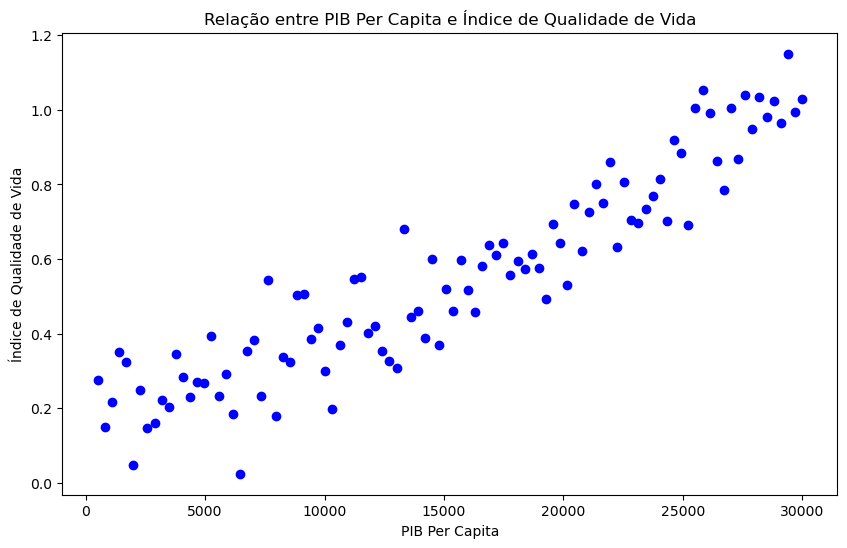

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# criando os valores para o eixo x e eixo y
x = np.linspace(500, 30000, 100)

# Adicionamos ruído aleatório ao y
np.random.seed(0) # Definimos a seed para que o resultado seja reproduzível
noise = np.random.normal(0, 0.1, size=len(x)) # Ruído com média 0 e desvio padrão 0.1
y = np.linspace(0.1, 0.99, 100) + noise


plt.figure(figsize=(10,6)) # ajustando o tamanho da figura

plt.scatter(x, y, color='blue') # criando o gráfico de dispersão

# dando nome aos eixos
plt.xlabel('PIB Per Capita')
plt.ylabel('Índice de Qualidade de Vida')

plt.title('Relação entre PIB Per Capita e Índice de Qualidade de Vida') # título do gráfico

plt.show() # mostrando o gráfico


Agora, imagine que a gente busque uma reta que descreva o comportamento desses dados:

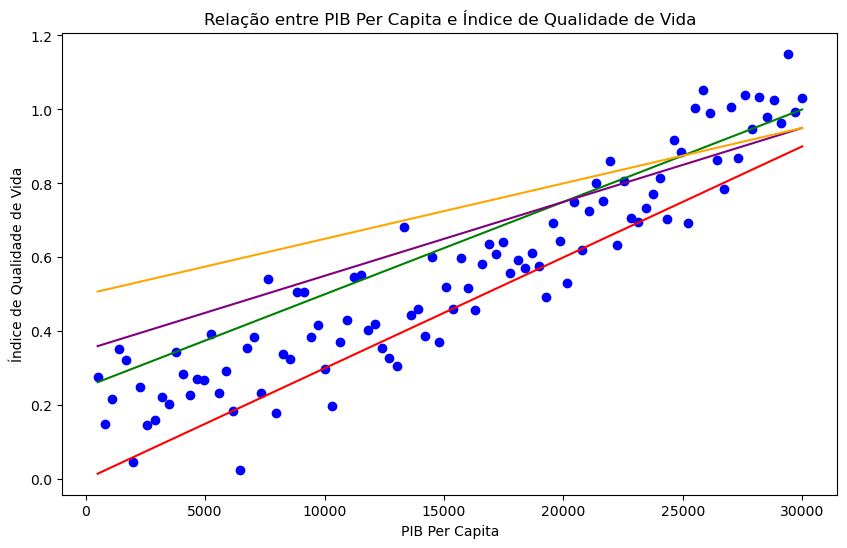

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# criando os valores para o eixo x e eixo y
x = np.linspace(500, 30000, 100)

# Adicionamos ruído aleatório ao y
np.random.seed(0) # Definimos a seed para que o resultado seja reproduzível
noise = np.random.normal(0, 0.1, size=len(x)) # Ruído com média 0 e desvio padrão 0.1
y = np.linspace(0.1, 0.99, 100) + noise


plt.figure(figsize=(10,6)) # ajustando o tamanho da figura

plt.scatter(x, y, color='blue') # criando o gráfico de dispersão

# dando nome aos eixos
plt.xlabel('PIB Per Capita')
plt.ylabel('Índice de Qualidade de Vida')

plt.title('Relação entre PIB Per Capita e Índice de Qualidade de Vida') # título do gráfico

# Criando 5 linhas de diferentes cores e inclinações
colors = ['red', 'green', 'purple', 'orange']
slopes = [0.00003, 0.000025, 0.00002, 0.000015] # diferentes inclinações
intercepts = [0, 0.25, 0.35, 0.5] # diferentes interceptações
for slope, intercept, color in zip(slopes, intercepts, colors):
    line_y = slope * x + intercept
    plt.plot(x, line_y, color=color)
    
# Adicionando uma caixa de texto ao lado do gráfico
#msg = "Qual das retas é a mais adequada para descrever os pontos?"
#plt.text(16000, 0.05, msg, fontsize=8, bbox=dict(facecolor='red', alpha=0.9))


plt.show() # mostrando o gráfico



A reta que passa mais próxima dos pontos é a reta que queremos. Em outras palavras, vamos observar a distância da reta para os pontos e a reta que tiver a menor distância é a reta escolhida.

A equação que obtemos para descrever esta reta é o que chamamos de regressão lnear. No fundo, nada mais é do que uma soma ponderada pelas características de entrada - no caso, o PIB - adicionada de uma constante, chamada de intercepto.

Vamos entender melhor como fazemos isso matematicamente!

## 2) Notação Matemática

A regressão linear, de maneira geral, será denotada da seguinte maneira:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

Na equação acima:

- Y é a variável dependente que estamos tentando prever ou explicar.
- X₁, X₂, ..., Xₚ são as variáveis independentes ou preditoras que usamos para prever Y.
- β₀ é o intercepto do modelo, que é o valor esperado de Y quando todas as variáveis independentes são zero.
- β₁, β₂, ..., βₚ são os coeficientes de regressão que representam a mudança na variável dependente Y correspondente a uma mudança de uma unidade na respectiva variável independente.
- ε é o erro aleatório ou termo de perturbação que representa a diferença entre os valores previstos e os valores reais.

Existem duas formas de se estimar os coeficientes:
- Método do Gradiente Descendente, onde utilizamos uma abordagem iterativa de otimização.
- Equação direta, "forma fechada", onde calculamos diretamente os parâmetros que melhor se encaixam no modelo, os parâmetros que minimizam a função custo.



## 3) Obtendo Estimadores BLUE 

### (Premissas da Regressão Linear)

Do livro Introductory Econometrics (J M Wooldridge), Capítulo 3, temos que as 4 premissas sob as quais o estimador OLS é não-viesado para os parâmetros populacionais são:<br>



Do livro Introductory Econometrics (J M Wooldridge), Capítulo 3, temos que as 4 premissas sob as quais o estimador OLS é não-viesado para os parâmetros populacionais são:<br>




<b>Linearidade nos parâmetros</b>

Significa que a variável dependente y se relaciona com x, a variável dependente, e u, o termo de erro, como:<br>
$y = b_0 + b_1 * x_1$

ou

$y = b_0+b_1^2 * x_1$

O que não acontece: <br>
$y = b_1 * x_1^2$<br>
ou<br>
$y = b_1 * x_1 * x_2$.

Isso não quer dizer que a gente não possa realizar transformações antes de rodar uma regressão linear. 

Verificação: É a própria especificação do modelo.



<b>Amostragem Aleatória</b>

Se não há aleatoriedade, não garantimos representatividade e não dá para garantir estimadores consistentes.

Verificação: Normalmente tomamos como verdade, principalmente para amostras relativamente grandes.


<b>Média Condicional do Termo de Erro é Zero</b>

$E(U|X_1, X_2, X_3, ..., X_n) = 0$

Verificação: Basta obter o valor esperado dos resíduos. Um plot de resíduos x variável independente também ajuda, pois você verificaria esta premissa (se eles estiverem ao redor de zero) e a última (se for constante ao longo do eixo).

<b>Ausência de Multicolinearidade Perfeita</b>

Esta premissa exige que as variáveis independentes não sejam combinações lineares perfeitas umas das outras. Se houver multicolinearidade perfeita, a matriz X'X (usada na fórmula do OLS) não será invertível, e nós não seremos capazes de calcular os estimadores do OLS. Mesmo se a multicolinearidade não for perfeita, mas alta, isso levará a estimativas imprecisas com alta variância.

Em resumo, seus coeficientes não serão confiáveis por conta dos erros nos testes de hipóteses.

Verificação: VIF, variance inflation factor.

O VIF é calculado ajustando uma regressão linear para cada variável preditora contra todas as outras variáveis preditoras e, em seguida, calculando o R-quadrado dessas regressões. O VIF para cada variável preditora é igual a 1 dividido por (1 - R-quadrado da regressão).

Valores VIF maiores que 1 indicam multicolinearidade. Uma regra prática comum é que se o VIF for maior que 5 (ou às vezes 10), então a multicolinearidade é alta, e você pode querer considerar remover algumas variáveis do modelo ou usar técnicas como a regularização para mitigar a multicolinearidade.

Um caso típico de multicolinearidade perfeita: transformar uma variável categórica em dummy para todos os seus valores.

VIF matematicamente:
    
$VIF(i) = \frac{1}{1 - R_i^2}$


Na fórmula do VIF, $R^2_i$ é o coeficiente de determinação (R-quadrado) da regressão de $X_i$ sobre todas as outras variáveis independentes.
A interpretação do $R^2$ neste contexto é o quanto da variabilidade na variável independente $X_i$ pode ser explicada por todas as outras variáveis independentes no modelo.

Então, o VIF é essencialmente o inverso de quanta "variação única" a variável $i$ traz para o modelo. Se a variável está altamente correlacionada com as outras variáveis (ou seja, tem um $R^2$ próximo de 1), então ela não está trazendo muita informação única para o modelo, e o VIF será alto. Um VIF maior que 5 ou 10 é geralmente indicativo de alta multicolinearidade.

A fórmula do VIF mostra por que um alto VIF é uma indicação de multicolinearidade: quando $R^2$ é alto (indicando que $X_i$ é altamente previsível a partir das outras variáveis), o denominador da fórmula do VIF é próximo de zero, tornando o VIF alto. Por outro lado, quando $R^2$ é baixo (indicando que $X_i$ não é muito previsível a partir das outras variáveis), o denominador da fórmula do VIF é próximo de 1, tornando o VIF baixo.

Assim, o VIF fornece uma medida quantitativa de quão fortemente a variável está correlacionada com as outras variáveis independentes. Isso pode ser útil para a detecção de problemas de multicolinearidade que podem afetar a interpretação dos coeficientes de regressão e a eficiência do modelo de regressão.





VIF no Python:
    
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for i, vif_value in enumerate(vif):
    print(X.columns[i], ":", vif_value)
```

<b>Homoscedasticidade</b>

Ao adicionarmos esta $5^a$ premissa, de Homoscedasticidade, temos as 5 premissas de Gauss-Markov, que garantem que temos estimadores BLUE (Best Linear Unbiased Estimators).

Homoscedasticidade significa que a variância dos erros é constante para todos os níveis da variável independente. Se os resíduos não tiverem variância constante (se forem heterocedásticos), então os erros padrão dos coeficientes podem ser tendenciosos. Isso pode levar a testes de hipóteses e intervalos de confiança não confiáveis (como testes t e testes F) porque todos dependem de erros padrão não tendenciosos. Em termos do teorema de Gauss-Markov e estimadores BLUE (Best Linear Unbiased Estimator), a homocedasticidade é um requisito-chave. O teorema afirma que, dada uma série de suposições (incluindo homocedasticidade), o estimador OLS tem a menor variância de todos os estimadores lineares não tendenciosos. Isso é o que o torna "melhor". Se a suposição de homocedasticidade for violada, então o estimador OLS ainda é não tendencioso, mas não é mais o melhor - ou seja, não é mais garantido que tenha a menor variância entre todos os estimadores lineares não tendenciosos. Isso pode levar a estimativas ineficientes em que a precisão poderia ter sido melhor com um estimador diferente que leva em conta a heterocedasticidade.

Verificação: A premissa de homoscedasticidade (variância constante dos erros) pode ser verificada visualizando um gráfico dos resíduos contra os valores ajustados. Se a dispersão dos resíduos não se altera significativamente ao longo do intervalo dos valores ajustados, a premissa de homoscedasticidade é satisfeita.

Verificação no Python:
    
```python

# Obtenha os valores ajustados e os resíduos
fitted_values = results.predict(X)
residuals = results.resid

# Plot dos resíduos
plt.scatter(fitted_values, residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='-')  # Adiciona uma linha horizontal em zero
plt.title('Gráfico de Resíduos')
plt.show()

```

Mas, veja só, isso invalida seu modelo?
NÃO, apenas não garante que os estimadores são os melhores lineares não viesados. No português claro: seus coeficientes não são tão confiáveis. Entretanto, seu modelo ainda pode sim ter valor preditivo.

## 3) Interpretando uma Regressão Linear

Vamos fazer nosso primeiro exemplo e aprender a interpretar uma regressão

In [6]:
import pandas as pd
from wooldridge import *
import statsmodels.formula.api as smf

gpa = dataWoo('GPA2')
gpa.head()

sat  tothrs  colgpa  athlete  verbmath  hsize  hsrank     hsperc  female   
0   920      43    2.04        1   0.48387   0.10       4  40.000000       1  \
1  1170      18    4.00        0   0.82813   9.40     191  20.319149       0   
2   810      14    1.78        1   0.88372   1.19      42  35.294117       0   
3   940      40    2.42        0   0.80769   5.71     252  44.133099       0   
4  1180      18    2.61        0   0.73529   2.14      86  40.186916       0   

   white  black    hsizesq  
0      0      0   0.010000  
1      1      0  88.360001  
2      1      0   1.416100  
3      1      0  32.604099  
4      1      0   4.579600

Dados do dataset:
- sat: combined SAT score
- tothrs: total hours through fall semest
- colgpa: GPA after fall semester
- athlete: =1 if athlete
- verbmath: verbal/math SAT score
- hsize: size grad. class, 100s
- hsrank: rank in grad. class
- hsperc: high school percentile, from top
- female: =1 if female
- white: =1 if white
- black: =1 if black
- hsizesq: hsize^2


PRIMEIRO MODELO

Vamos verificar como a posição do aluno durante o colégio (hsperc) e sua nota do SAT se relacionam com seu GPA. Ou seja, queremos estimar:

$colgpa = B_0 + B_1 * hsperc + B_2 * sat$

Vamos verificar como ficaria o nosso modelo:

In [7]:
results = smf.ols('colgpa ~ hsperc + sat', data=gpa).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.77e-287
Time:                        16:56:59   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

EQUAÇÃO ENCONTRADA:

Bom, vamos começar olhando quem são $B_0, B_1 e B_2$. Podemos observar que estes valores são, respectivamente, 1.3918, -0.0135 e 0.0015. Em outras palavras, nossa equação ficou:

$colgpa = 1.3918 - 0.0135 * hsperc + 0.0015 * sat$


QUESTÕES:

Antes de avançarmos para entender o resto da tabela, responda às seguintes perguntas:
- Se 2 alunos tiveram 10 pontos de diferença na pontuação deles do SAT, tudo mais constante, quanto esperaríamos que fosse a diferença do GPA deles?
- Por que faz sentido o coeficiente de sat seja positivo?
- Qual o GPA para quando tivermos hsperc=20 e sat=1050?
- Mantendo hsperc fixo, qual a diferença na pontuação SAT que levaria a uma colgpa diferente em 0.5?

ANALISANDO OS RESULTADOS:

Bom, agora, vamos entender outros termos importantes da nossa tabela:

<b>R-squared:</b> O R-quadrado, também chamado de coeficiente de determinação, é uma medida estatística que é usada para avaliar a qualidade de ajuste de um modelo de regressão linear. Ele varia entre 0 e 1 e descreve a proporção da variância da variável dependente que é explicada pela variável independente no modelo de regressão.

Em outras palavras, R-quadrado é a porcentagem da variância da variável dependente que as variáveis independentes explicam coletivamente. Um R-quadrado de 100% indica que todas as mudanças na variável dependente são totalmente explicadas pelas mudanças nas variáveis independentes.

Sua fórmula é dada por:<br>
$R^2 = 1 - \frac{SSR}{SST}$

Sendo que:
- $R^2$ é o coeficiente de determinação.
- SSR (Soma dos Quadrados dos Resíduos): representa a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo de regressão. Essa métrica mensura a variabilidade não explicada pelo modelo, ou seja, a parcela de variabilidade que não pode ser explicada pelas variáveis independentes incluídas no modelo. Quanto menor for o valor de SSR, maior será a capacidade do modelo em explicar a variabilidade nos dados.
- SST (Soma Total dos Quadrados): representa a soma dos quadrados das diferenças entre os valores observados da variável dependente e a média dos valores observados. Essa métrica mensura a variabilidade total da variável dependente, independente do modelo. Em outras palavras, ela representa a variabilidade que existe nos dados antes de aplicar qualquer modelo de regressão.

<b>Adj. R-Squared:</b> O r-quadrado tem uma "falha" que é a de que ele aumenta (ou mantém) seu valor na medida que aumentamos o número de coeficientes. O R-quadrado ajustado, por outro lado, leva em conta o número de preditores no modelo. Aumentará apenas se a nova variável melhorar o modelo mais do que seria esperado por acaso. Ele diminuirá quando uma variável não útil for adicionada.

Fórmula matemática:<br>
$R_{adj}^2 = 1 - (1 - R^2)\frac{(n-1)}{(n-k-1)}$


<b>F-Statistic:</b> Significância do modelo. A estatística F é uma medida estatística utilizada na análise de regressão linear para avaliar a significância global do modelo. Ela é calculada a partir da comparação entre a variabilidade explicada pelo modelo e a variabilidade não explicada. A F-statistic representa o valor calculado da estatística F, enquanto a F-statistic (probabilistic) é o valor p associado a essa estatística.

O valor p (probabilistic) é usado para testar a hipótese nula de que não há relação entre as variáveis independentes e a variável dependente. Se o valor p for menor que um determinado nível de significância (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que o modelo é estatisticamente significativo.


<b>P>|t|:</b> Esta é a medida estatística que representa o valor p associado a cada coeficiente estimado em um modelo estatístico, como por exemplo, em uma regressão linear.

O valor p, ou valor de significância, indica a probabilidade de obter um resultado igual ou mais extremo do que o observado, assumindo que a hipótese nula seja verdadeira. A hipótese nula geralmente afirma que não há relação ou efeito significativo entre a variável independente associada ao coeficiente e a variável dependente.



ANÁLISE DOS RESÍDUOS

In [8]:
# Valor esperado
np.mean(results.resid)

3.9503221954271945e-16

Aparentemente, temos um valor esperado bem baixo, próximo de zero. Ou seja, atende à premissa.

É sempre útil olhar a distribuição dos resíduos para entender como é seu comportamento:

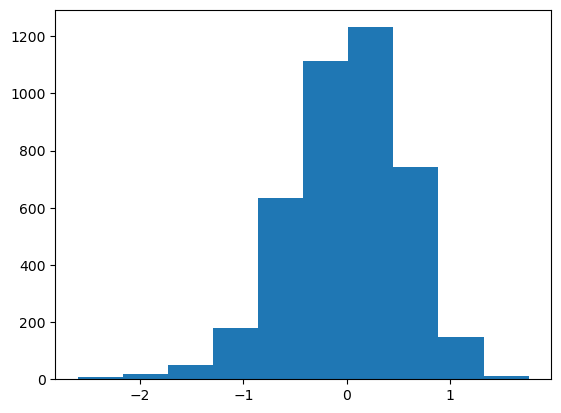

In [10]:
_ = plt.hist(results.resid)
_ = plt.show()

Parece uma distribuição normal ao redor de zero. Vamos verificar pelo ECDF:

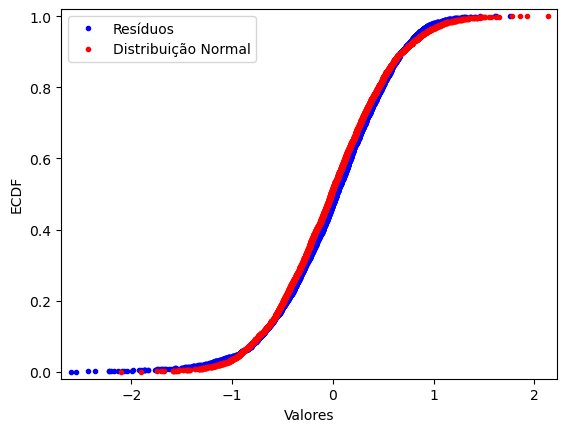

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cálculo do ECDF dos resíduos
n = len(results.resid)
x = np.sort(results.resid)
y = np.arange(1, n+1) / n

# Gerar amostras de uma distribuição normal com base nos resíduos
mu, sigma = np.mean(results.resid), np.std(results.resid)
samples = np.random.normal(mu, sigma, size=n)
samples.sort()
ecdf_samples = np.arange(1, n+1) / n

# Plot do ECDF dos resíduos e da distribuição normal
plt.plot(x, y, marker='.', linestyle='none', color='blue', label='Resíduos')
plt.plot(samples, ecdf_samples, marker='.', linestyle='none', color='red', label='Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('ECDF')
plt.legend()
plt.margins(0.02)  # Adiciona margens para melhor visualização
plt.show()


Se preferir fazer um teste:

In [13]:

from scipy.stats import shapiro

# Teste de normalidade dos resíduos
statistic, p_value = shapiro(results.resid)
print('Estatística do teste:', statistic)
print('Valor p:', p_value)


Estatística do teste: 0.987342894077301
Valor p: 8.28784877652286e-19


ANÁLISE DOS RESÍDUOS: HOMOSCEDASTICIDADE

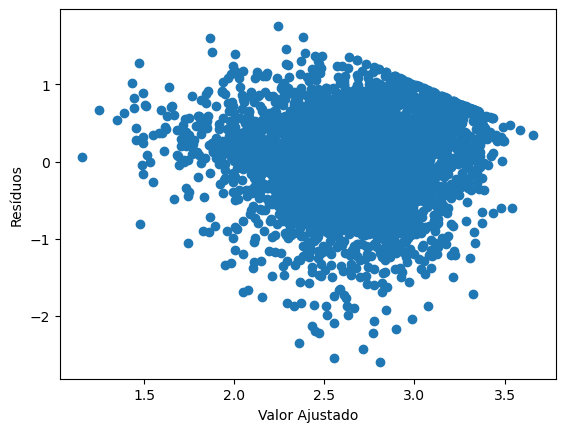

In [15]:
# Obtém o valor ajustado
fitted_values = results.fittedvalues

# Gráfico dos resíduos em relação ao valor ajustado (Checando homoscedasticidade)
plt.scatter(fitted_values, results.resid)
plt.xlabel('Valor Ajustado')
plt.ylabel('Resíduos')
plt.show()


Parece que a variância não é constante ao longo do tempo. Ou seja, temos um pequeno problema de heteroscedasticidade.

## 4) Exemplos Aplicados

EXEMPLO 1: INFERÊNCIA SOBRE SALÁRIO

In [14]:
wage = dataWoo('WAGE2')
wage.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south   
0   769     40   93   35    12     11       2   31        1      0      0  \
1   808     50  119   41    18     11      16   37        1      0      0   
2   825     40  108   46    14     11       9   33        1      0      0   
3   650     40   96   32    12     13       7   32        1      0      0   
4   562     40   74   27    11     14       5   34        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     1      2.0    8.0    8.0  6.645091  
1      1     1      NaN   14.0   14.0  6.694562  
2      1     1      2.0   14.0   14.0  6.715384  
3      1     4      3.0   12.0   12.0  6.476973  
4      1    10      6.0    6.0   11.0  6.331502

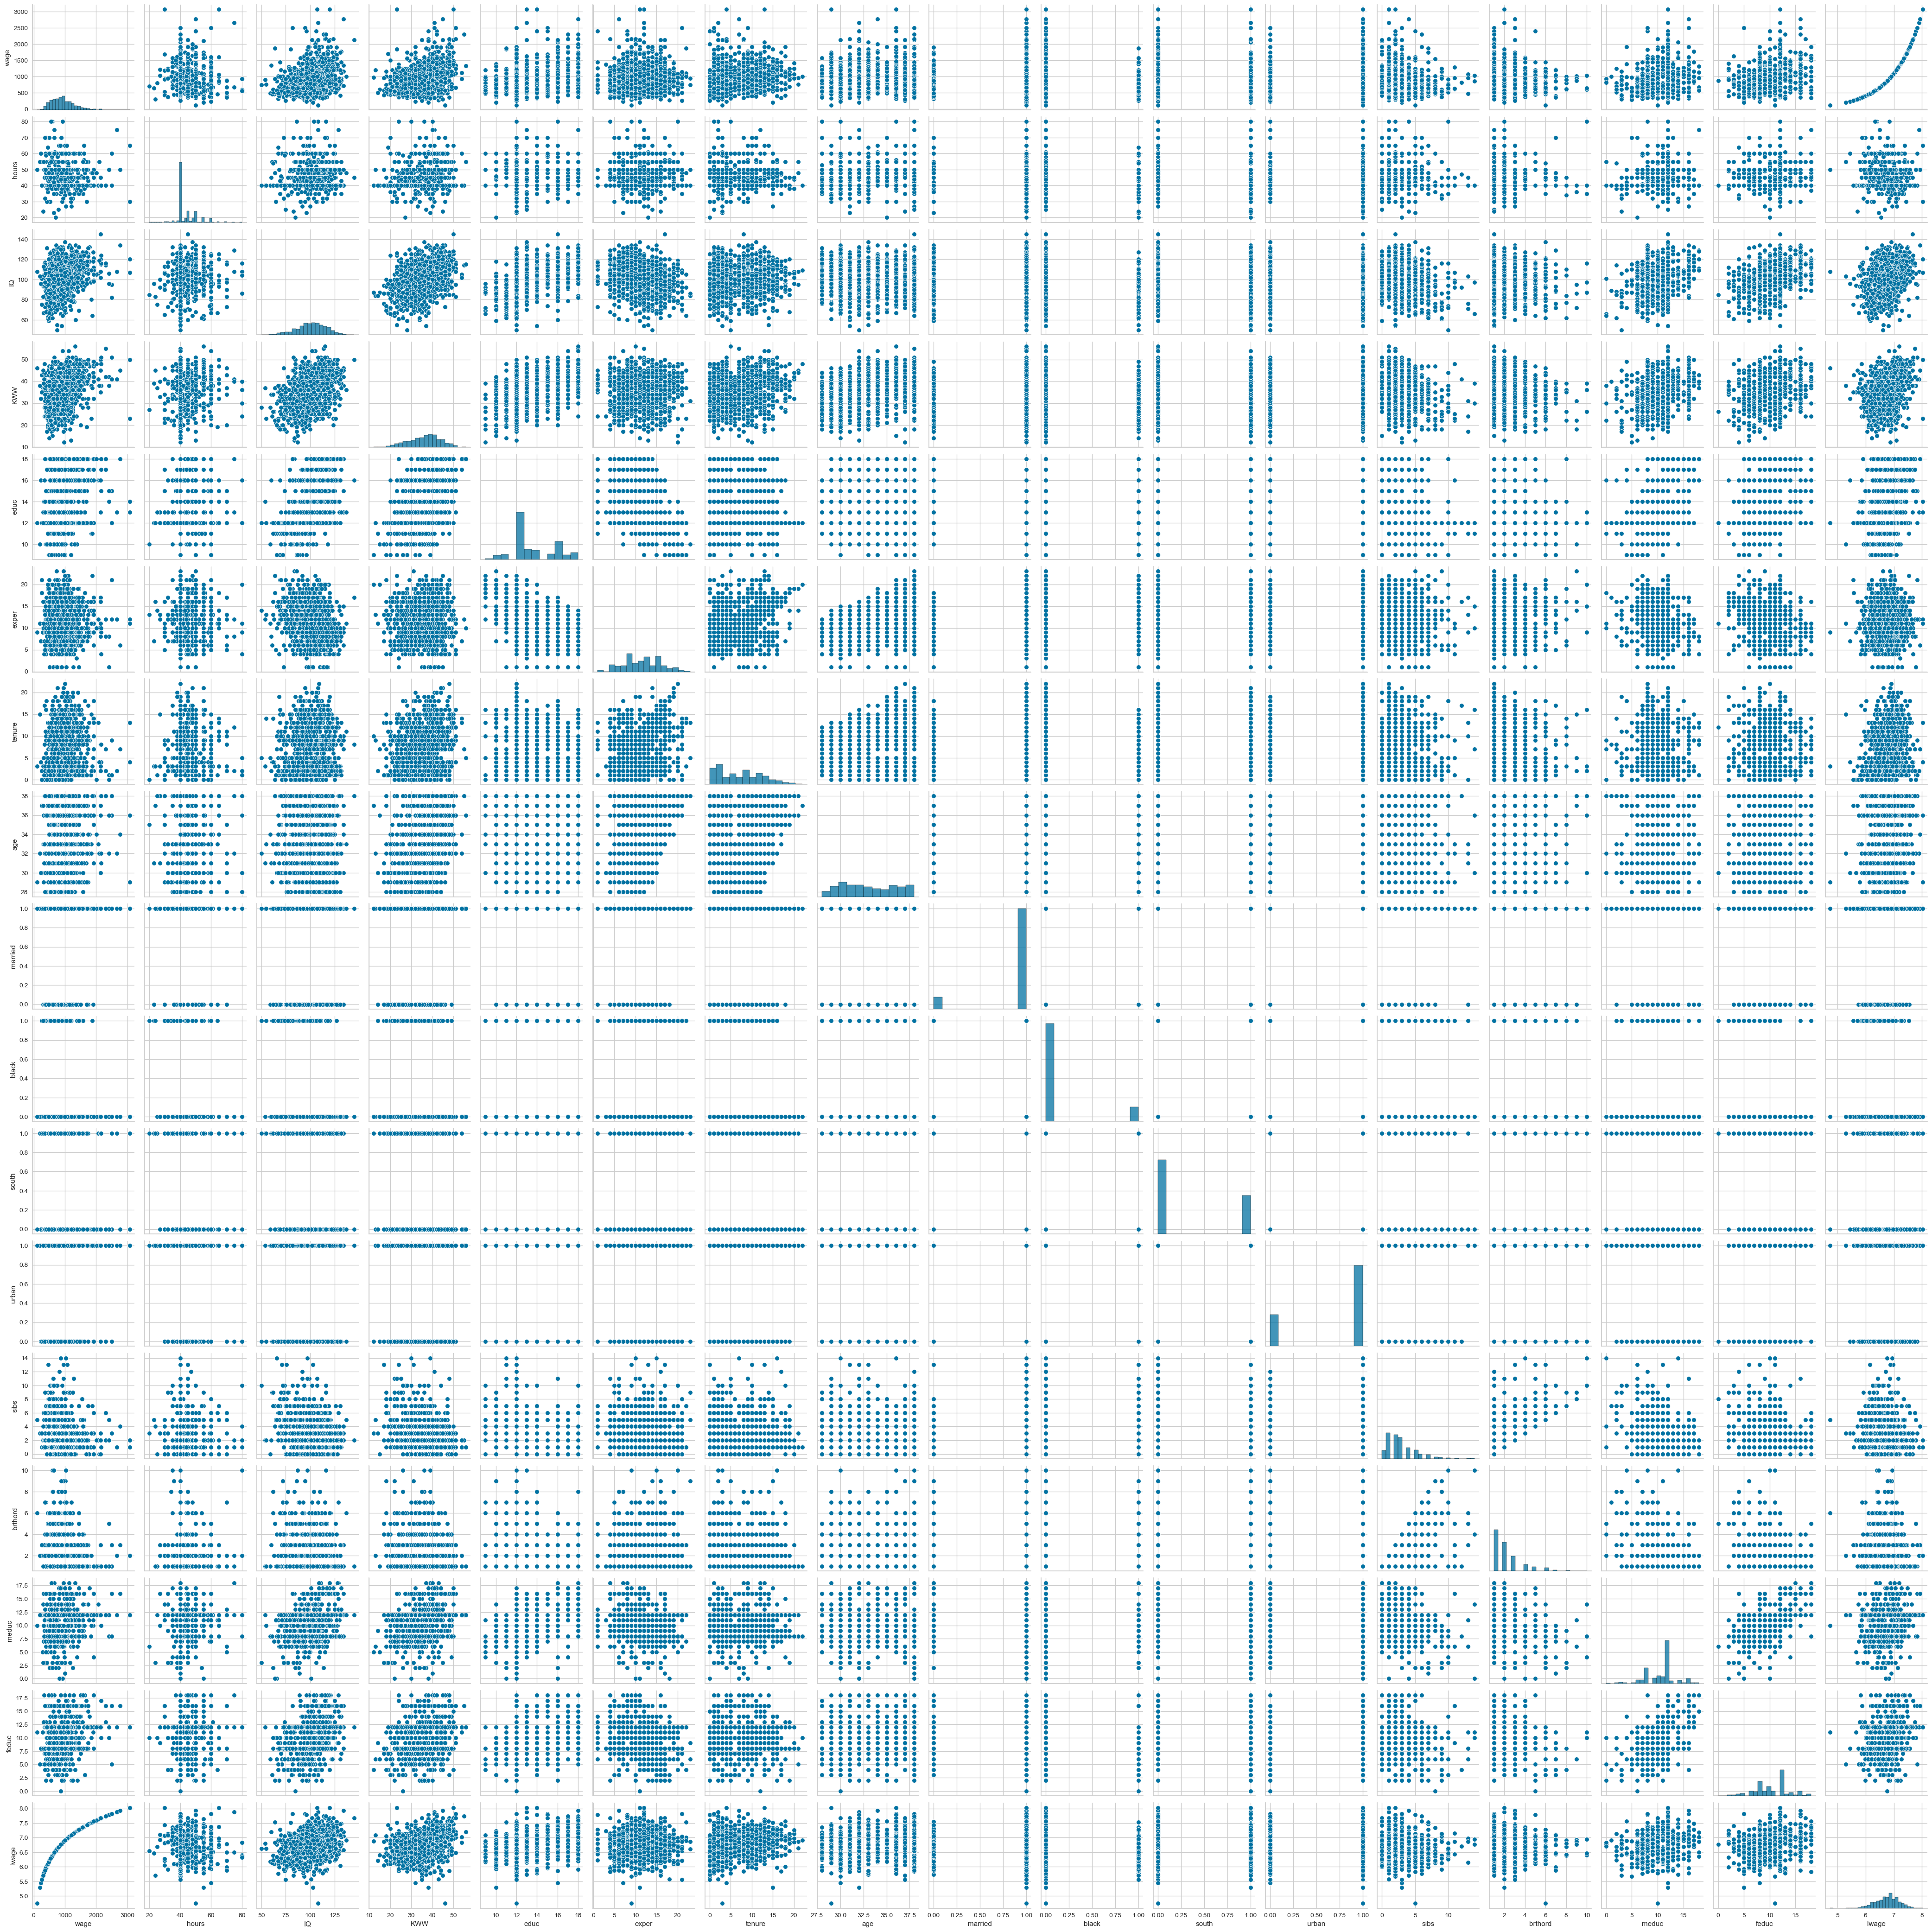

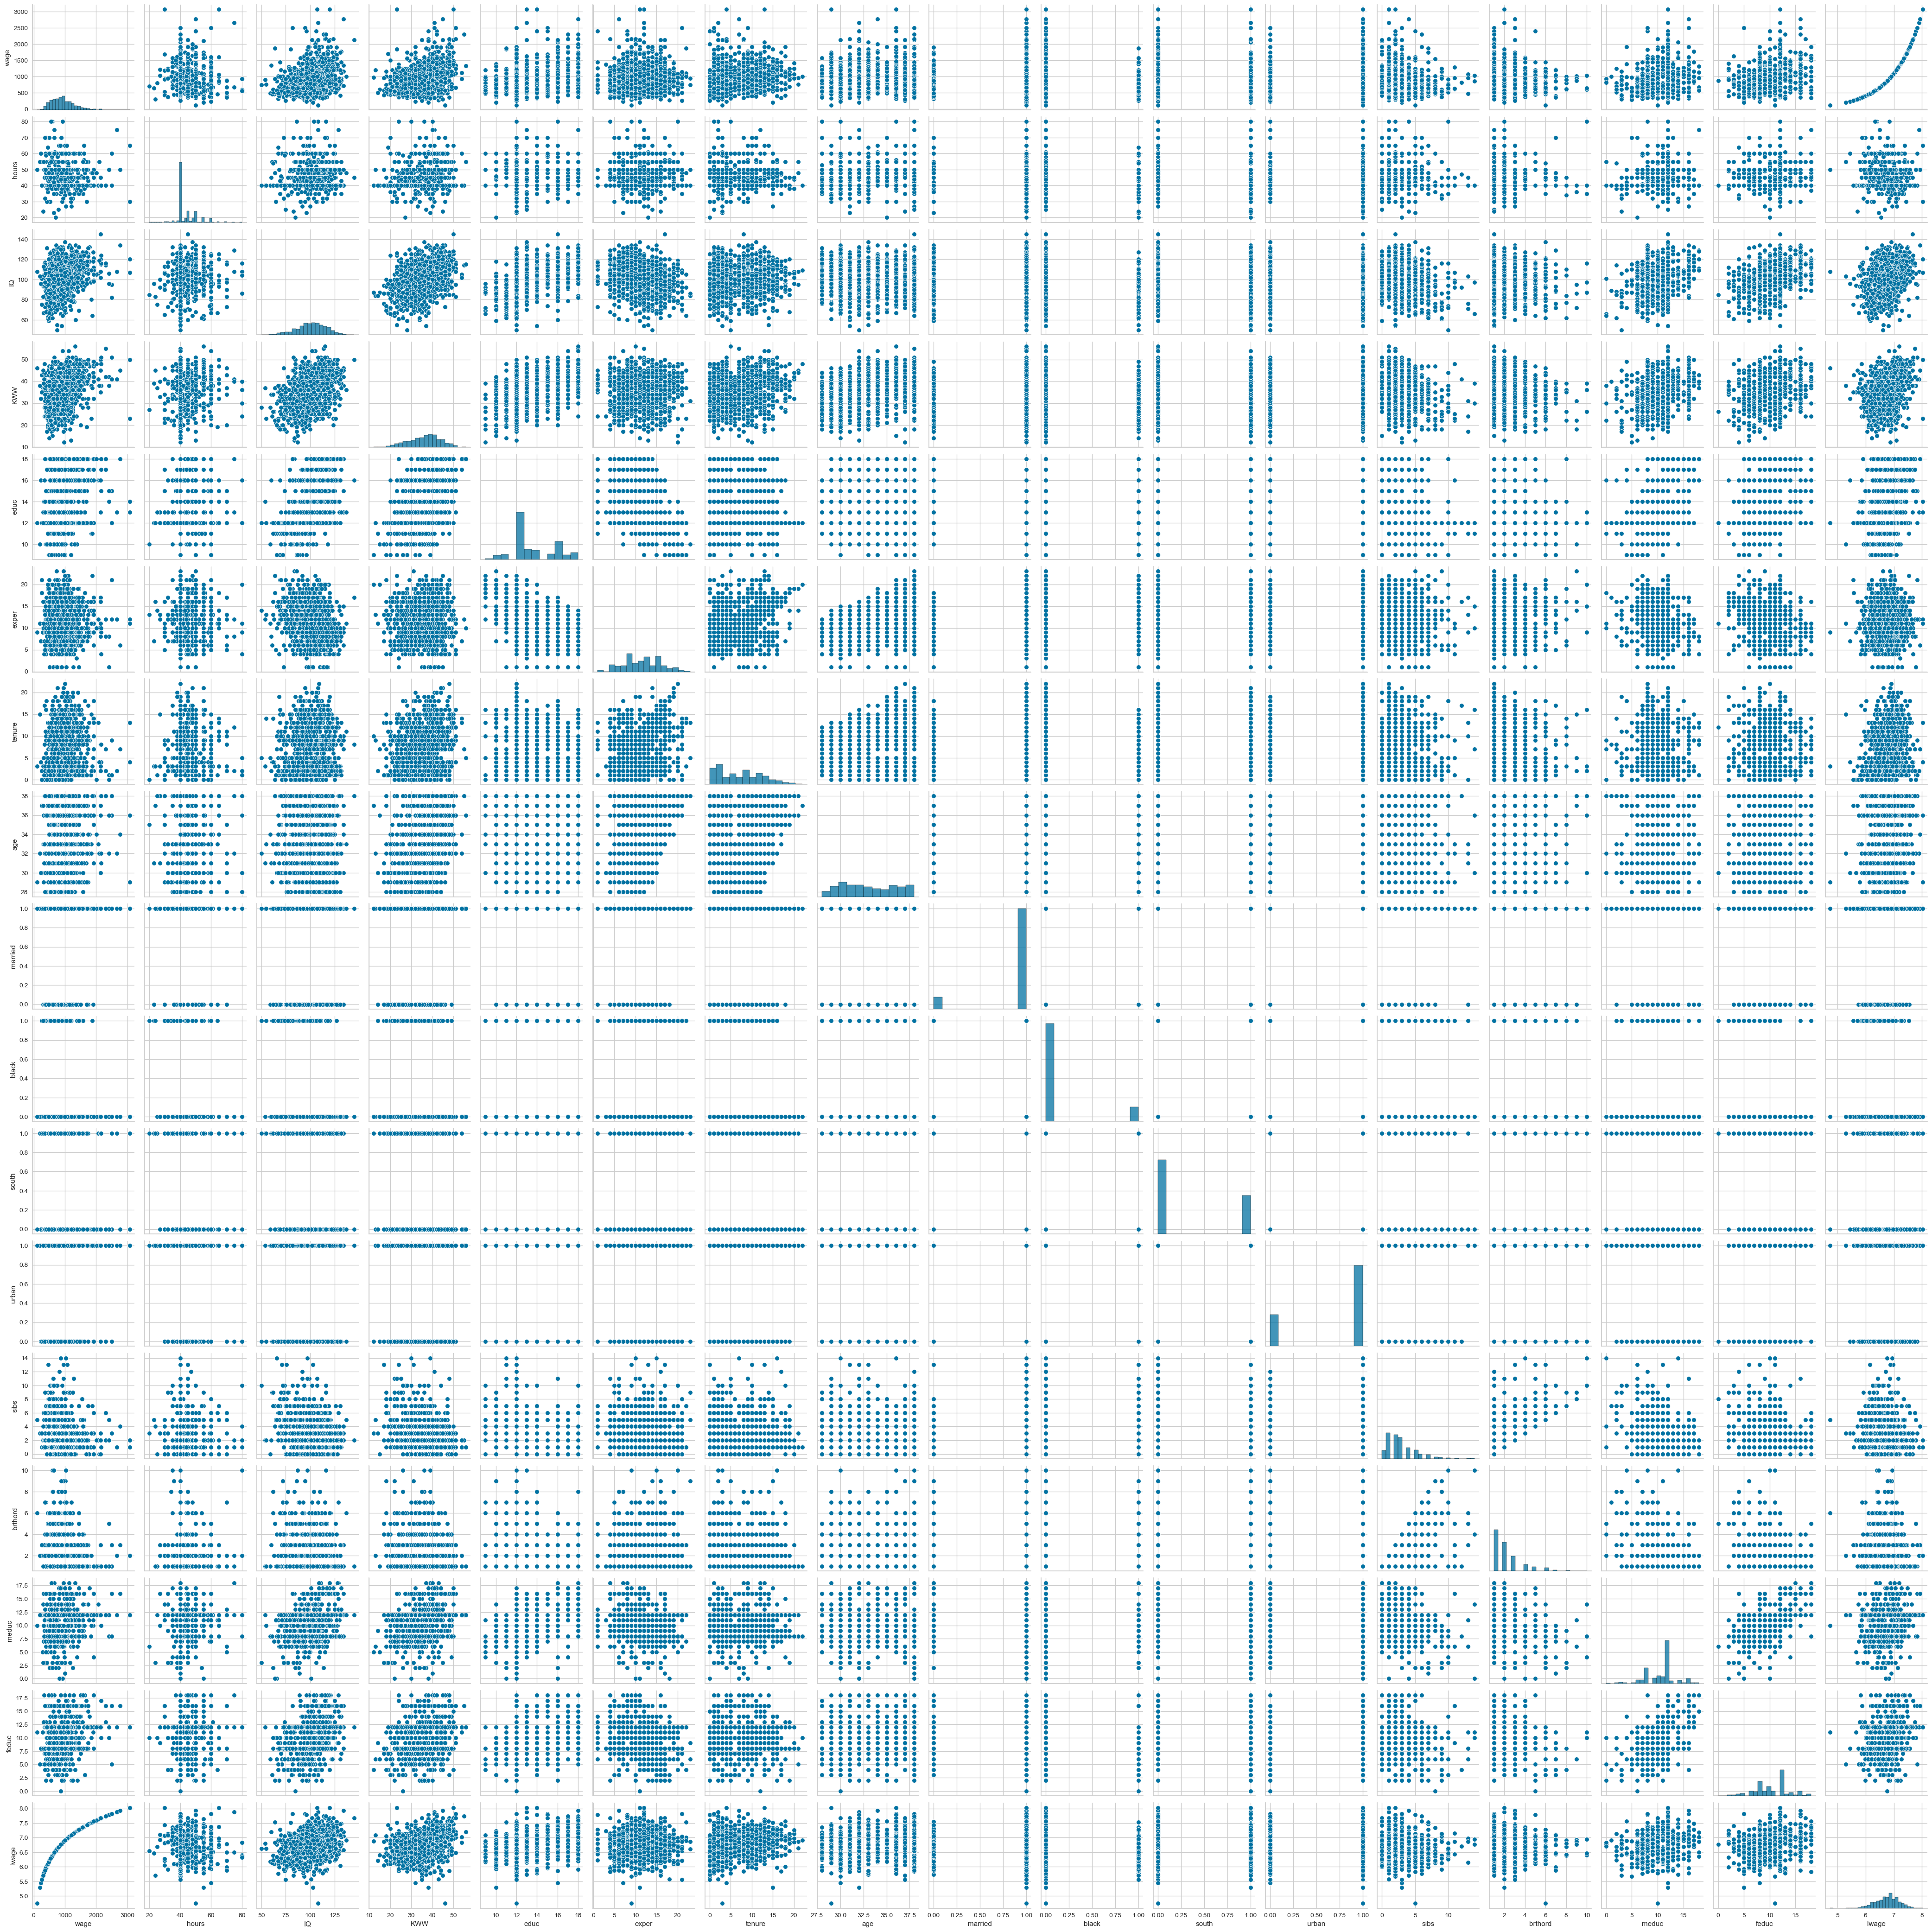

In [100]:
_ = sns.pairplot(wage)
_ = plt.show()

In [96]:
wage.corr()

wage     hours        IQ       KWW      educ     exper    tenure   
wage     1.000000 -0.009504  0.309088  0.326131  0.327109  0.002190  0.128266  \
hours   -0.009504  1.000000  0.073839  0.113889  0.091009 -0.062126 -0.055528   
IQ       0.309088  0.073839  1.000000  0.413516  0.515697 -0.224913  0.042159   
KWW      0.326131  0.113889  0.413516  1.000000  0.388134  0.017452  0.141398   
educ     0.327109  0.091009  0.515697  0.388134  1.000000 -0.455573 -0.036167   
exper    0.002190 -0.062126 -0.224913  0.017452 -0.455573  1.000000  0.243654   
tenure   0.128266 -0.055528  0.042159  0.141398 -0.036167  0.243654  1.000000   
age      0.156702  0.024812 -0.043741  0.393053 -0.012254  0.495330  0.270602   
married  0.136583  0.032563 -0.014668  0.089948 -0.058566  0.106349  0.072605   
black   -0.210878 -0.107850 -0.387869 -0.280753 -0.179457  0.055849 -0.078236   
south   -0.159387 -0.029519 -0.209785 -0.094392 -0.097033  0.021257 -0.061691   
urban    0.198406  0.016573  0.038936  0.098190  0.072151 -0.047386 -0.038486   
sibs    -0.159204 -0.049603 -0.284773 -0.284975 -0.239288  0.064310 -0.039161   
brthord -0.145485 -0.043130 -0.179439 -0.153585 -0.204992  0.088300 -0.028478   
meduc    0.214832  0.076620  0.331804  0.240792  0.364239 -0.186317 -0.014968   
feduc    0.237587  0.063172  0.343908  0.234889  0.426925 -0.256793 -0.059241   
lwage    0.953141 -0.047219  0.314788  0.306271  0.312117  0.020601  0.185853   

              age   married     black     south     urban      sibs   brthord   
wage     0.156702  0.136583 -0.210878 -0.159387  0.198406 -0.159204 -0.145485  \
hours    0.024812  0.032563 -0.107850 -0.029519  0.016573 -0.049603 -0.043130   
IQ      -0.043741 -0.014668 -0.387869 -0.209785  0.038936 -0.284773 -0.179439   
KWW      0.393053  0.089948 -0.280753 -0.094392  0.098190 -0.284975 -0.153585   
educ    -0.012254 -0.058566 -0.179457 -0.097033  0.072151 -0.239288 -0.204992   
exper    0.495330  0.106349  0.055849  0.021257 -0.047386  0.064310  0.088300   
tenure   0.270602  0.072605 -0.078236 -0.061691 -0.038486 -0.039161 -0.028478   
age      1.000000  0.106980 -0.035646 -0.029478 -0.006749 -0.040719  0.005436   
married  0.106980  1.000000 -0.053448  0.022757 -0.040248 -0.004327 -0.014737   
black   -0.035646 -0.053448  1.000000  0.236458  0.070200  0.305277  0.103371   
south   -0.029478  0.022757  0.236458  1.000000 -0.109898  0.066320  0.093707   
urban   -0.006749 -0.040248  0.070200 -0.109898  1.000000 -0.031469  0.002420   
sibs    -0.040719 -0.004327  0.305277  0.066320 -0.031469  1.000000  0.593914   
brthord  0.005436 -0.014737  0.103371  0.093707  0.002420  0.593914  1.000000   
meduc   -0.029319 -0.022763 -0.221198 -0.157874  0.034024 -0.287151 -0.275934   
feduc   -0.071303 -0.020324 -0.199503 -0.172363  0.112239 -0.232026 -0.230371   
lwage    0.161822  0.149976 -0.232071 -0.194811  0.203798 -0.152809 -0.141853   

            meduc     feduc     lwage  
wage     0.214832  0.237587  0.953141  
hours    0.076620  0.063172 -0.047219  
IQ       0.331804  0.343908  0.314788  
KWW      0.240792  0.234889  0.306271  
educ     0.364239  0.426925  0.312117  
exper   -0.186317 -0.256793  0.020601  
tenure  -0.014968 -0.059241  0.185853  
age     -0.029319 -0.071303  0.161822  
married -0.022763 -0.020324  0.149976  
black   -0.221198 -0.199503 -0.232071  
south   -0.157874 -0.172363 -0.194811  
urban    0.034024  0.112239  0.203798  
sibs    -0.287151 -0.232026 -0.152809  
brthord -0.275934 -0.230371 -0.141853  
meduc    1.000000  0.576495  0.213575  
feduc    0.576495  1.000000  0.223385  
lwage    0.213575  0.223385  1.000000

In [101]:
wage.columns

Index(['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age',
       'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc',
       'feduc', 'lwage'],
      dtype='object')

In [105]:
results = smf.ols('wage ~ KWW + black + sibs', data=wage).fit()

print(results.summary())
 

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     43.69
Date:                Sat, 27 May 2023   Prob (F-statistic):           2.03e-26
Time:                        13:11:05   Log-Likelihood:                -6876.8
No. Observations:                 935   AIC:                         1.376e+04
Df Residuals:                     931   BIC:                         1.378e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8448     69.742      6.708      0.0

In [104]:
results = smf.ols('wage ~ IQ + KWW + black + sibs', data=wage).fit()

print(results.summary())
 

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     40.40
Date:                Sat, 27 May 2023   Prob (F-statistic):           3.11e-31
Time:                        13:10:02   Log-Likelihood:                -6863.5
No. Observations:                 935   AIC:                         1.374e+04
Df Residuals:                     930   BIC:                         1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.7528    104.836      0.551      0.5

## 5) Leituras Adicionais 

Discussões sobre regressão linear e suas premissas:
- Sobre normalidade dos resíduos: https://stats.stackexchange.com/questions/54533/what-do-normal-residuals-mean-and-what-does-this-tell-me-about-my-data#:~:text=Normality%20of%20the%20residuals%20is,It%27s%20that%20simple!
- Lidando com heteroscedasticidade: https://stats.stackexchange.com/questions/147119/best-way-to-deal-with-heteroscedasticity
- Demonstração do R-Quadrado: https://www.youtube.com/watch?v=lng4ZgConCM


## 6) Reflexão Prática

Já notaram que em muitos momentos, mesmo com um trabalho sendo voltado para inferência, a gente vê premissas serem negligenciadas? Isso vale até mesmo para papers em journals de relevância. Eu sempre tive curiosidade de entender essa questão, mas eu não encontrei em lugar nenhum, nem em fóruns, nem nos livros de Econometria, nem mesmo nos próprios Journals. Como eu ainda queria muito esta resposta, consolidei algumas informações de discussões offline que tive, do Quora, do Stackexchange e até mesmo do ChatGPT (que pareciam coerentes) e montei aqui uma lista de possibilidades que explicam estas supostas "infrações" serem aceitas: 

- Robustez dos estimadores: Os estimadores usados na regressão linear, como o método dos mínimos quadrados ordinários (MQO), podem ser robustos em relação a violações de certas suposições. Por exemplo, os estimadores MQO podem ser consistentes mesmo se os erros forem heterocedásticos ou se a suposição de média condicional for levemente violada. Essa propriedade de robustez pode justificar a ignorância ou relaxamento de suposições específicas.
- Tamanho da amostra grande: Com tamanhos de amostra grandes, algumas suposições podem se tornar menos críticas. A lei dos grandes números sugere que, à medida que o tamanho da amostra aumenta, a média e a variância amostral convergem para a média e a variância populacional, tornando a suposição de amostragem aleatória e a suposição de média condicional menos problemáticas na prática.
- Análise de sensibilidade: Os pesquisadores podem realizar análises de sensibilidade para avaliar o impacto das violações das suposições. Ao explorar como os resultados mudam sob diferentes suposições, eles podem fornecer uma compreensão mais detalhada da robustez e generalizabilidade de seus achados.
- Trade-offs e considerações práticas: Em alguns casos, os pesquisadores podem priorizar outros aspectos de sua análise, como disponibilidade de dados, complexidade do modelo ou interpretabilidade, em relação à aderência estrita a todas as suposições. Eles podem fazer escolhas informadas com base no contexto específico da pesquisa e nos trade-offs envolvidos.

Embora seja importante buscar uma inferência válida considerando as suposições da regressão linear, os pesquisadores frequentemente tomam decisões informadas com base nos objetivos específicos, contexto e características de seus dados. Também vale ressaltar que o impacto das violações das suposições pode variar dependendo da pergunta de pesquisa específica e da natureza dos dados.

Bom lembrar também que estamos falando de INFERÊNCIA e não de PREDIÇÃO. 